<a href="https://colab.research.google.com/github/AdrianLopez-55/Machine_Learning_Adrian_Lopez/blob/main/Actividad_ML_Adrian_Lopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ESCUELA DE POSGRADO NEWMAN**

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL**

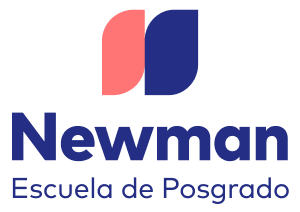

**Aprendizaje Automático**

**Informe de Actividad**

Detección de anomalías y técnicas de agrupamiento

**Docente**

Dr. Oscar Juan Jimenez Flores

**Presentado por**

Adrian Pablo López Espinoza

# **Librerias utilizadas para la actividad**

In [1]:
# Importa pandas para la manipulación y análisis de datos.
import pandas as pd

# Importa numpy para el manejo de arreglos y cálculos numéricos.
import numpy as np

# Importa seaborn para visualización de datos con gráficos estadísticos.
import seaborn as sns

# Importa matplotlib para crear gráficos de visualización de datos.
import matplotlib.pyplot as plt

#Importa NearestNeighbors para realizar búsquedas de similitud, clustering. Permite encontrar los vecinos más cercanos
from sklearn.neighbors import NearestNeighbors

# Importa IsolationForest de sklearn para detectar y eliminar valores atípicos (outliers).
from sklearn.ensemble import IsolationForest

# Importa KMeans y DBSCAN de sklearn para realizar clustering (agrupación de datos).
from sklearn.cluster import KMeans, DBSCAN

# Importa StandardScaler para escalar las características numéricas.
from sklearn.preprocessing import StandardScaler

# Importa PCA (Análisis de Componentes Principales) para la reducción de la dimensionalidad.
from sklearn.decomposition import PCA

# Importa KElbowVisualizer de yellowbrick para visualizar el codo en el método de KMeans.
from yellowbrick.cluster import KElbowVisualizer

# Importa tabulate para formatear los datos en tablas legibles.
from tabulate import tabulate

#  **2.1. EDA - Análisis exploratorio de datos**

# Carga Del Conjunto de datos

In [2]:
# Carga del dataset desde el repositorio de GitHub en formato CSV usando pandas.
url = "https://raw.githubusercontent.com/AdrianLopez-55/CardiotocologyDataBase/main/CTG.csv"

# Utiliza pandas para leer el archivo CSV desde la URL y cargarlo en un DataFrame llamado 'df'.
df = pd.read_csv(url)

# Análisis Descriptivo De Los Datos

In [3]:
# Análisis descriptivo de los datos

# Inicializa una lista vacía para almacenar la información sobre cada columna del conjunto de datos.
info_data = []

# Itera sobre cada columna en el DataFrame 'df' para obtener información descriptiva.
for col in df.columns:
    # Para cada columna, se recoge:
    # - El nombre de la columna
    # - El tipo de datos de la columna (dtype)
    # - El número de valores faltantes (NaN)
    # - El número de valores únicos en la columna
    # - El valor mínimo (si la columna no es de tipo objeto, caso contrario "-")
    # - El valor máximo (si la columna no es de tipo objeto, caso contrario "-")
    info_data.append([
        col,  # Nombre de la columna
        df[col].dtype,  # Tipo de datos de la columna
        df[col].isnull().sum(),  # Cantidad de valores faltantes (NaN)
        df[col].nunique(),  # Número de valores únicos
        df[col].min() if df[col].dtype != 'object' else "-",  # Valor mínimo (para columnas numéricas)
        df[col].max() if df[col].dtype != 'object' else "-"  # Valor máximo (para columnas numéricas)
    ])

# Define los encabezados para la tabla que se mostrará.
headers = ["Columna", "Tipo", "Valores Faltantes", "Valores Unicos", "Minimo", "Maximo"]

# Usa la librería 'tabulate' para mostrar la información de manera estructurada y legible en formato de tabla.
print(tabulate(info_data, headers=headers, tablefmt="fancy_grid"))

╒═══════════╤═════════╤═════════════════════╤══════════════════╤══════════╤══════════╕
│ Columna   │ Tipo    │   Valores Faltantes │   Valores Unicos │ Minimo   │ Maximo   │
╞═══════════╪═════════╪═════════════════════╪══════════════════╪══════════╪══════════╡
│ FileName  │ object  │                   3 │              352 │ -        │ -        │
├───────────┼─────────┼─────────────────────┼──────────────────┼──────────┼──────────┤
│ Date      │ object  │                   3 │               48 │ -        │ -        │
├───────────┼─────────┼─────────────────────┼──────────────────┼──────────┼──────────┤
│ SegFile   │ object  │                   3 │             2126 │ -        │ -        │
├───────────┼─────────┼─────────────────────┼──────────────────┼──────────┼──────────┤
│ b         │ float64 │                   3 │              979 │ 0.0      │ 3296.0   │
├───────────┼─────────┼─────────────────────┼──────────────────┼──────────┼──────────┤
│ e         │ float64 │                   3

# 2.1.2. De Las Variables Numéricas, Hallar Datos Estadísticos.

In [4]:
# De las variables numéricas, hallar datos estadísticos.

# Se transpone el DataFrame resultante para facilitar su visualización (intercambia filas y columnas).
stats = df.describe().T

# Mostrar los datos estadísticos en formato tabular usando 'tabulate'
print(tabulate(stats, headers="keys", tablefmt="fancy_grid", floatfmt=".2f"))

╒══════════╤═════════╤═════════╤════════╤════════╤═════════╤═════════╤═════════╤═════════╕
│          │   count │    mean │    std │    min │     25% │     50% │     75% │     max │
╞══════════╪═════════╪═════════╪════════╪════════╪═════════╪═════════╪═════════╪═════════╡
│ b        │ 2126.00 │  878.44 │ 894.08 │   0.00 │   55.00 │  538.00 │ 1521.00 │ 3296.00 │
├──────────┼─────────┼─────────┼────────┼────────┼─────────┼─────────┼─────────┼─────────┤
│ e        │ 2126.00 │ 1702.88 │ 930.92 │ 287.00 │ 1009.00 │ 1241.00 │ 2434.75 │ 3599.00 │
├──────────┼─────────┼─────────┼────────┼────────┼─────────┼─────────┼─────────┼─────────┤
│ LBE      │ 2126.00 │  133.30 │   9.84 │ 106.00 │  126.00 │  133.00 │  140.00 │  160.00 │
├──────────┼─────────┼─────────┼────────┼────────┼─────────┼─────────┼─────────┼─────────┤
│ LB       │ 2126.00 │  133.30 │   9.84 │ 106.00 │  126.00 │  133.00 │  140.00 │  160.00 │
├──────────┼─────────┼─────────┼────────┼────────┼─────────┼─────────┼─────────┼─────────┤

# 2.1.3. De Variables Categoricas, Listar Las Diferentes Categorías Y Hallar La Frecuencia De Cada Una De Ellas.

In [5]:
# De variables categoricas, listar las diferentes categorías y hallar la frecuencia de cada una de ellas.

# Seleccionar las columnas del DataFrame que son de tipo 'object' (es decir, variables categóricas).
category_colum = df.select_dtypes(include=['object']).columns
# Iterar sobre cada columna categórica para obtener la frecuencia de sus categorías.
for column in category_colum:
  frequency = df[column].value_counts().reset_index()
  # Cambiar los nombres de las columnas a la categoría y su frecuencia correspondiente.
  frequency.columns = [column, "Frecuencia"]
  print(f"\n **Frecuencia de la variable '{column}':**\n")
  print(tabulate(frequency, headers="keys", tablefmt="fancy_grid"))
  print("\n"+"-"*50) #Separador de tablas

Se han truncado las últimas 5000 líneas del flujo de salida.
│  35 │ S7001014.dsp   │           15 │
├─────┼────────────────┼──────────────┤
│  36 │ S0001105.dat   │           14 │
├─────┼────────────────┼──────────────┤
│  37 │ S0001090.dat   │           14 │
├─────┼────────────────┼──────────────┤
│  38 │ S0001096.dat   │           14 │
├─────┼────────────────┼──────────────┤
│  39 │ S0001071.dat   │           14 │
├─────┼────────────────┼──────────────┤
│  40 │ S0001016.dat   │           14 │
├─────┼────────────────┼──────────────┤
│  41 │ S0001086.dat   │           14 │
├─────┼────────────────┼──────────────┤
│  42 │ S0001092.dat   │           14 │
├─────┼────────────────┼──────────────┤
│  43 │ S0001036.dat   │           14 │
├─────┼────────────────┼──────────────┤
│  44 │ S0001010.dat   │           13 │
├─────┼────────────────┼──────────────┤
│  45 │ S0001039.dat   │           13 │
├─────┼────────────────┼──────────────┤
│  46 │ S7001013.dsp   │           13 │
├─────┼────────────

# 2.1.4 Crear Matriz De Correlaciones Existentes Entre Las Variables Numéricas Del Conjunto De Datos.

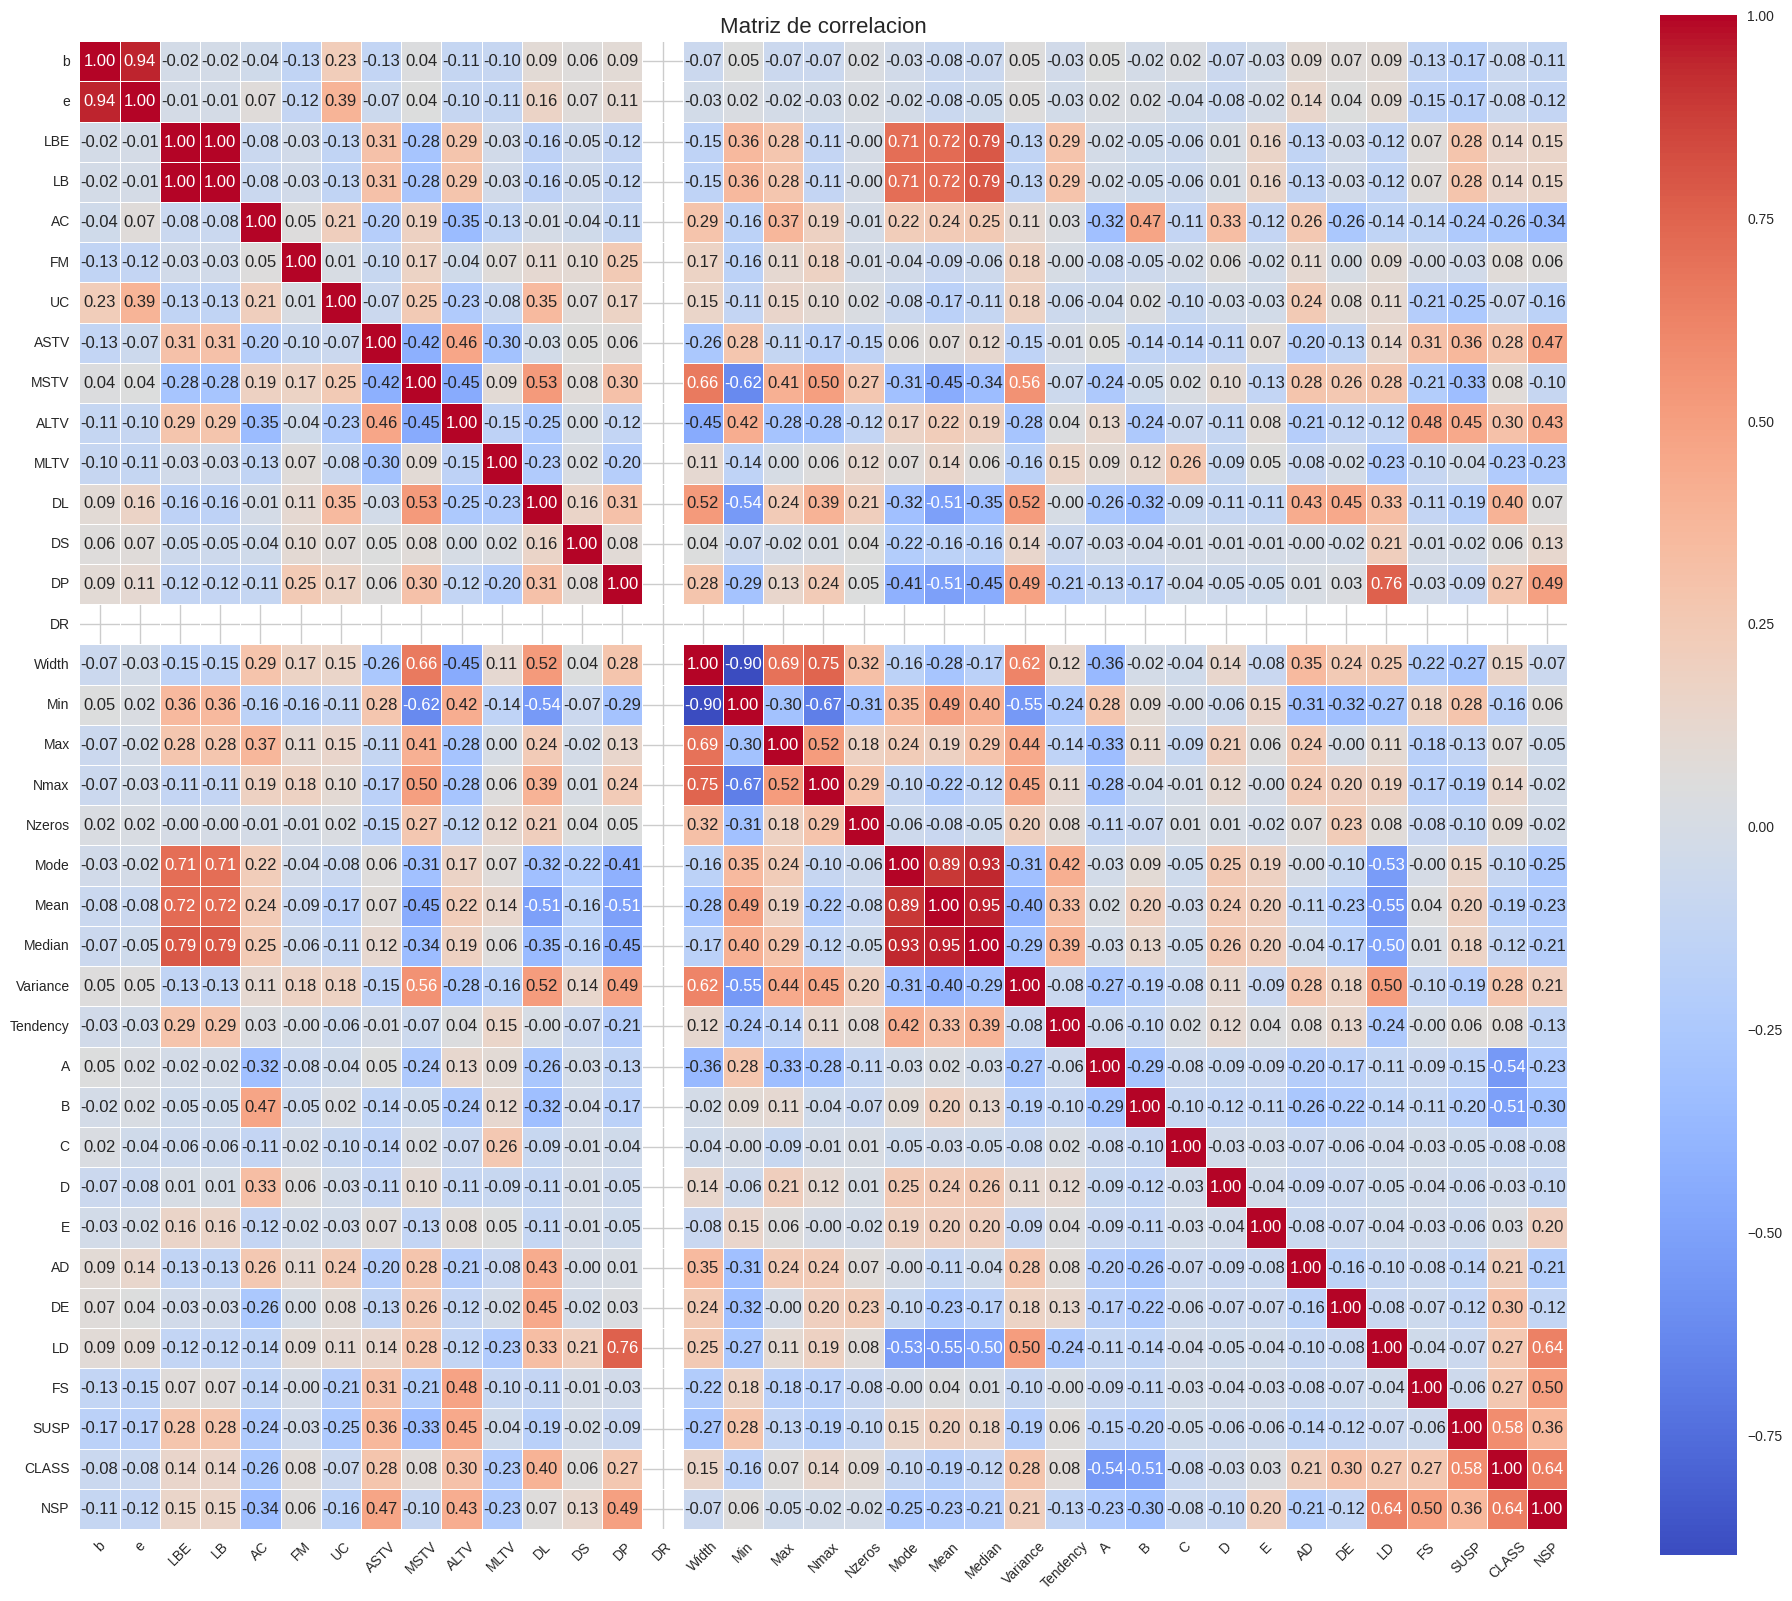


 **50 Correlaciones más Altas:**
╒══════╤══════════════╤══════════════╤═══════════════╕
│      │ Variable 1   │ Variable 2   │   Correlación │
╞══════╪══════════════╪══════════════╪═══════════════╡
│   77 │ LBE          │ LB           │          1.00 │
├──────┼──────────────┼──────────────┼───────────────┤
│  799 │ Mean         │ Median       │          0.95 │
├──────┼──────────────┼──────────────┼───────────────┤
│    1 │ b            │ e            │          0.94 │
├──────┼──────────────┼──────────────┼───────────────┤
│  762 │ Mode         │ Median       │          0.93 │
├──────┼──────────────┼──────────────┼───────────────┤
│  571 │ Width        │ Min          │          0.90 │
├──────┼──────────────┼──────────────┼───────────────┤
│  761 │ Mode         │ Mean         │          0.89 │
├──────┼──────────────┼──────────────┼───────────────┤
│   96 │ LBE          │ Median       │          0.79 │
├──────┼──────────────┼──────────────┼───────────────┤
│  513 │ DP           │ LD     

In [6]:
# Crear matriz de correlaciones existentes entre las variables numéricas del conjunto de datos, analizar los resultados.

# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Crear la matriz de correlación entre las columnas numéricas
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(24, 20))
# Crear un mapa de calor para visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("Matriz de correlacion", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Analisis de correlaciones mas altas y mas bajas
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ["Variable 1", "Variable 2", "Correlación"]

# Filtrar las correlaciones para eliminar las repeticiones (pares inversos) y las correlaciones de autovariables (diagonal)
correlation_pairs = correlation_pairs[correlation_pairs["Variable 1"] != correlation_pairs["Variable 2"]]
# Convertir valores a positivos para ordenar
correlation_pairs["Correlación"] = correlation_pairs["Correlación"].abs()
# Eliminar duplicados, quedándose solo con el primer par de variables con cada correlación
correlation_pairs = correlation_pairs.drop_duplicates(subset=["Correlación"], keep="first")

# Mostrar las correlaciones mas altas
top_correlations = correlation_pairs.sort_values(by="Correlación", ascending=False).head(50)

print("\n **50 Correlaciones más Altas:**")
print(tabulate(top_correlations, headers="keys", tablefmt="fancy_grid", floatfmt=".2f"))

## **Tratamiento De Missing**

# Análisis De Los Datos Faltantes

In [7]:
# Analisis de datos faltantates

# Verificar valores faltantes en el dataset
missing_values = df.isnull().sum()
# Calcular el porcentaje de valores faltantes por columna.
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

# Combinar los resultados en un DataFrame para una visualización más clara
missing_summary = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje (%)': missing_values_percentage
})

# Mostrar las filas del resumen de valores faltantes solo para las columnas que tienen valores faltantes
missing_summary[missing_summary["Valores Faltantes"] > 0]

,Valores Faltantes,Porcentaje (%)
FileName,3,0.140911
Date,3,0.140911
SegFile,3,0.140911
b,3,0.140911
e,3,0.140911
LBE,3,0.140911
LB,3,0.140911
AC,3,0.140911
FM,2,0.093941
UC,2,0.093941


# Llenado De Valores Faltantes

In [8]:
# Rellenado de datos

# Identificar columnas numéricas y categóricas
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(exclude=['number']).columns

# Rellenar los valores faltantes en las columnas numéricas con la mediana
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Rellenar los valores faltantes en las columnas categóricas con la moda
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Verificar si aún quedan valores faltantes
print(df.isnull().sum().sum()) # Si muestra valor 0 entonces no hay valores fantantes

# Guardar el nuevo conjunto de datos limpio en un archivo CSV llamado 'CTG_clean.csv'
df.to_csv("CTG_clean.csv", index=False)

0


# Vista del Nuevo Dataset

In [9]:
# Mostrar datos del nuevo dataset

# Cargar el archivo limpio guardado anteriormente (CTG_clean.csv)
df_clean = pd.read_csv("CTG_clean.csv")

info_data = []
for col in df_clean.columns:
  info_data.append([
      col,
      df_clean[col].dtype,
      df_clean[col].isnull().sum(),
      df_clean[col].nunique(),
      df_clean[col].min() if df_clean[col].dtype != 'object' else "-",
      df_clean[col].max() if df_clean[col].dtype != 'object' else "-"
  ])

# Mostrar los datos en formato tabular usando la librería 'tabulate'
headers = ["Columna", "Tipo", "Valores Faltantes", "Valores Unicos", "Minimo", "Maximo"]
print(tabulate(info_data, headers=headers, tablefmt="fancy_grid"))

╒═══════════╤═════════╤═════════════════════╤══════════════════╤══════════╤══════════╕
│ Columna   │ Tipo    │   Valores Faltantes │   Valores Unicos │ Minimo   │ Maximo   │
╞═══════════╪═════════╪═════════════════════╪══════════════════╪══════════╪══════════╡
│ FileName  │ object  │                   0 │              352 │ -        │ -        │
├───────────┼─────────┼─────────────────────┼──────────────────┼──────────┼──────────┤
│ Date      │ object  │                   0 │               48 │ -        │ -        │
├───────────┼─────────┼─────────────────────┼──────────────────┼──────────┼──────────┤
│ SegFile   │ object  │                   0 │             2126 │ -        │ -        │
├───────────┼─────────┼─────────────────────┼──────────────────┼──────────┼──────────┤
│ b         │ float64 │                   0 │              979 │ 0.0      │ 3296.0   │
├───────────┼─────────┼─────────────────────┼──────────────────┼──────────┼──────────┤
│ e         │ float64 │                   0

## **2.2 Detección De Anomalías**

# Aplicar Dos Técnica De Detección De Anomalías Y Explicar Los Resultados Obtenidos.

In [10]:
# Seleccion de solo variables numericas
numeric_df_clean = df_clean.select_dtypes(include=[np.number])

# Técnica 1: Isolation Forest

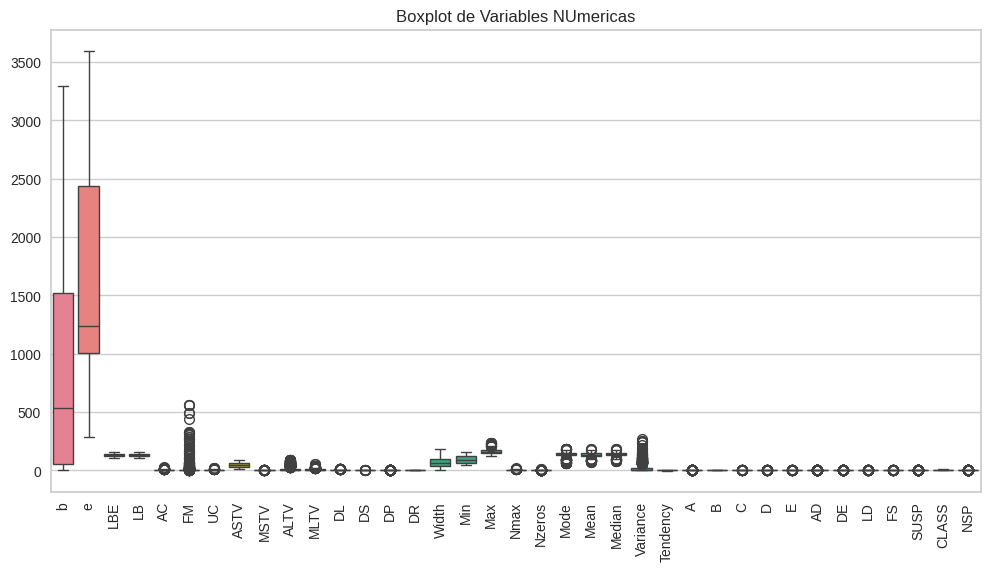

Numero de anomalias detectadas por Isolation Forest
╒════╤════════════╤════════════╕
│    │   Etiqueta │   Cantidad │
╞════╪════════════╪════════════╡
│  0 │          1 │       2022 │
├────┼────────────┼────────────┤
│  1 │         -1 │        107 │
╘════╧════════════╧════════════╛


In [11]:
# isolation forest

# Crear el modelo de Isolation Forest
# 'contamination=0.05' indica que se espera que aproximadamente el 5% de los datos sean anómalos.
# 'random_state=42' asegura que los resultados sean reproducibles.
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
# Aplicar el modelo de Isolation Forest al conjunto de datos limpio.
df_clean["Anomaly_IF"] = isolation_forest.fit_predict(numeric_df_clean)

# Contar cuántas anomalías (outliers) han sido detectadas.
outlier_if = df_clean["Anomaly_IF"].value_counts()

# Visualización gráfica de los outliers mediante un boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=numeric_df_clean)
plt.xticks(rotation=90)
plt.title("Boxplot de Variables NUmericas")
plt.show()

# Mostrar los resultados en formato tabular, mostrando el número de anomalías detectadas
print("Numero de anomalias detectadas por Isolation Forest")
print(tabulate(outlier_if.reset_index(), headers=["Etiqueta", "Cantidad"], tablefmt="fancy_grid"))

# Técnica 2: Z-Score

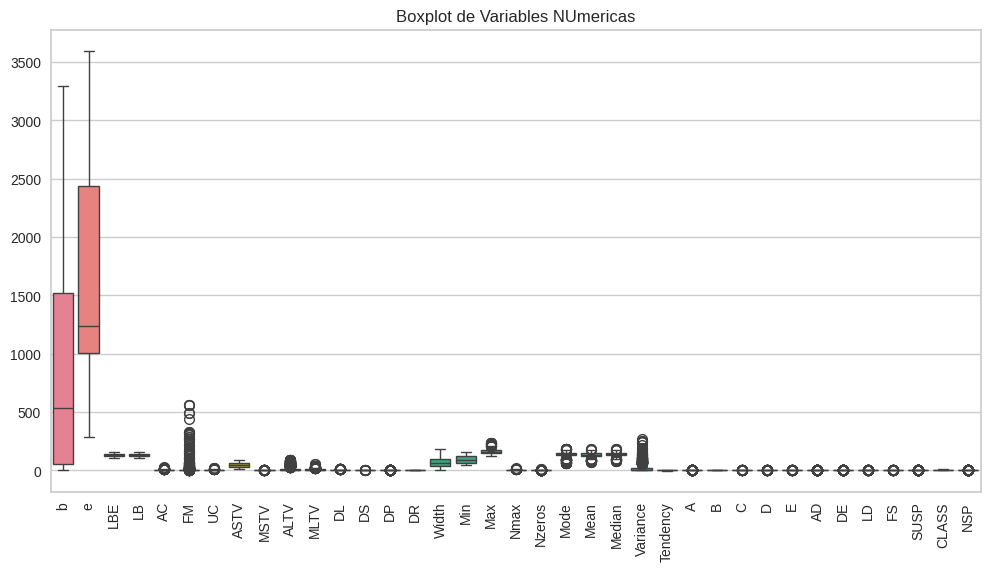

numero de outlier por z-score (>+-2.5)
╒════╤════════════╤════════════╕
│    │ Variable   │   Cantidad │
╞════╪════════════╪════════════╡
│  0 │ DE         │        252 │
├────┼────────────┼────────────┤
│  1 │ SUSP       │        197 │
├────┼────────────┼────────────┤
│  2 │ NSP        │        176 │
├────┼────────────┼────────────┤
│  3 │ LD         │        107 │
├────┼────────────┼────────────┤
│  4 │ ALTV       │        105 │
├────┼────────────┼────────────┤
│  5 │ DL         │         82 │
├────┼────────────┼────────────┤
│  6 │ D          │         81 │
├────┼────────────┼────────────┤
│  7 │ E          │         72 │
├────┼────────────┼────────────┤
│  8 │ DP         │         70 │
├────┼────────────┼────────────┤
│  9 │ FS         │         69 │
├────┼────────────┼────────────┤
│ 10 │ Variance   │         69 │
├────┼────────────┼────────────┤
│ 11 │ AC         │         67 │
├────┼────────────┼────────────┤
│ 12 │ Mode       │         64 │
├────┼────────────┼────────────┤
│ 13

In [12]:
# Z-Score

# Calcular el Z-Score para cada valor en las variables numéricas.
z_score = (numeric_df_clean - numeric_df_clean.mean()) / numeric_df_clean.std()

# Definir el umbral para clasificar los outliers.
# En este caso, se utiliza un umbral de 2.5, lo que significa que los valores con un Z-Score mayor a 2.5 o menor a -2.5
# se considerarán outliers (anómalos).
umbral = 2.5
# Detectar outliers basados en el Z-Score.
outlier_z = (z_score.abs() > umbral).sum().sort_values(ascending=False)

# Visualización de los outliers en un boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=numeric_df_clean)
plt.xticks(rotation=90)
plt.title("Boxplot de Variables NUmericas")
plt.show()

# Mostrar los resultados en formato tabular, mostrando cuántos outliers fueron detectados por Z-Score
print("numero de outlier por z-score (>+-2.5)")
print(tabulate(outlier_z.reset_index(), headers=["Variable", "Cantidad"], tablefmt="fancy_grid"))

# **2.3 Clúster**

# Aplicar Dos Técnica de Agrupamiento, Explicar La Técnica Y Los Resultados Obtenidos.

In [13]:
# Normalizar datos para mejorar los resultados del agrupamiento

# Importar el StandardScaler de sklearn para normalizar los datos
scaler = StandardScaler()
# Aplicar la normalización a los datos numéricos para tener una media de 0 y desviación estándar de 1
scaled_data = scaler.fit_transform(numeric_df_clean)

# Técnica 1: K-Means Clustering

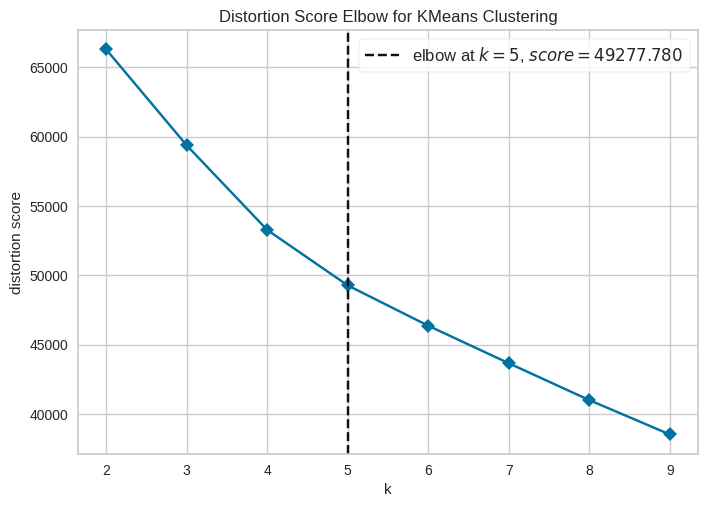

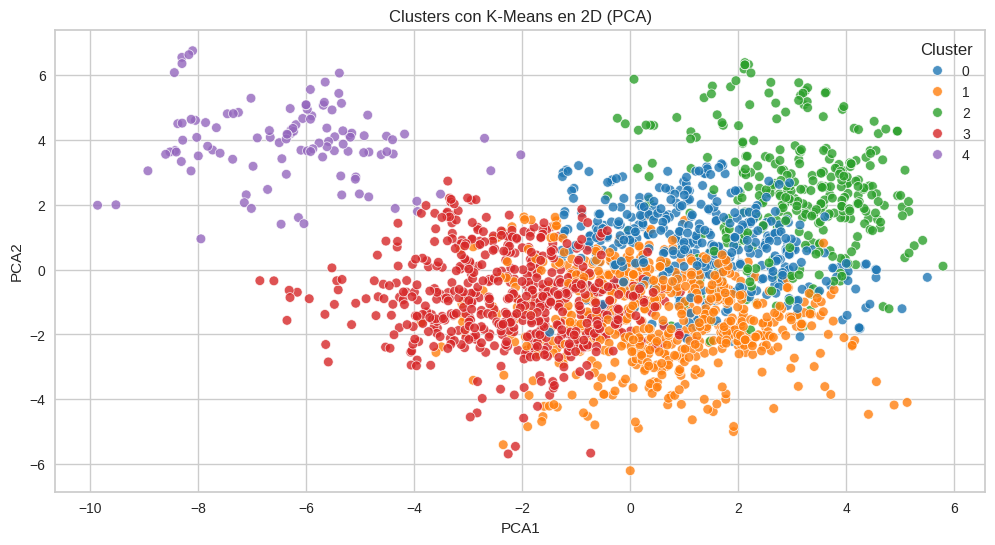

<ipython-input-14-7059f07fe89f>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x="Cluster_KMeans", palette="viridis")


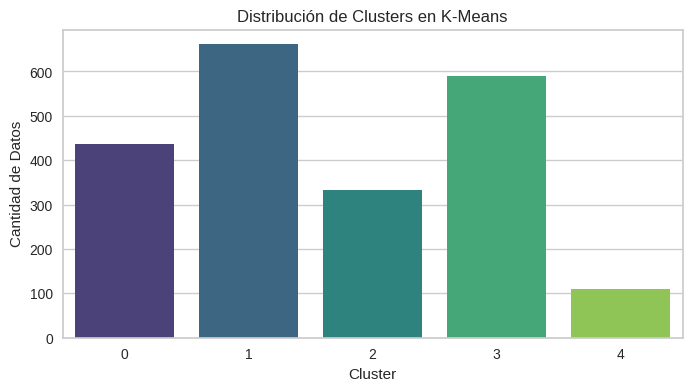

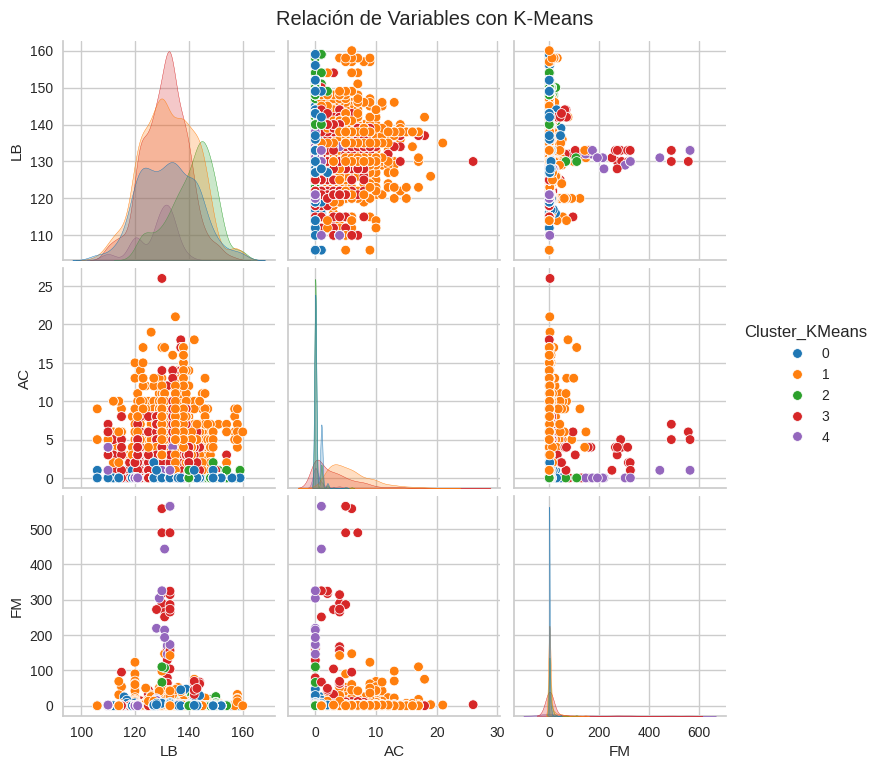

In [14]:
# K-Means Clustering

# Determinación del número óptimo de clusters usando el método del codo
# Se define el modelo KMeans con una cantidad de inicializaciones (n_init) de 10 y un estado aleatorio fijo (random_state)
model = KMeans(n_init=10, random_state=42)
# Visualizer para el método del codo, probando con 2 a 10 clusters
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
visualizer.fit(scaled_data)
visualizer.show()

# Aplicar K-Means con el número óptimo de clusters determinado en el paso anterior
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
df_clean["Cluster_KMeans"] = kmeans.fit_predict(scaled_data)

# Aplicar PCA (Análisis de Componentes Principales) para reducir las dimensiones de los datos a 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df_clean["PCA1"] = pca_result[:, 0]
df_clean["PCA2"] = pca_result[:, 1]

# Gráfico 2D de los clusters obtenidos con K-Means, proyectados en el espacio reducido por PCA
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_clean, x="PCA1", y="PCA2", hue="Cluster_KMeans", palette="tab10", alpha=0.8)
plt.title("Clusters con K-Means en 2D (PCA)")
plt.legend(title="Cluster")
plt.show()

# Gráfico de distribución de los clusters obtenidos con K-Means
plt.figure(figsize=(8, 4))
sns.countplot(data=df_clean, x="Cluster_KMeans", palette="viridis")
plt.title("Distribución de Clusters en K-Means")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de Datos")
plt.show()

# Pairplot para visualizar cómo se relacionan las variables "LB", "AC" y "FM" con los clusters
sns.pairplot(df_clean, vars=["LB", "AC", "FM"], hue="Cluster_KMeans", palette="tab10", diag_kind="kde")
plt.suptitle("Relación de Variables con K-Means", y=1.02)
plt.show()

# Técnica 2: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

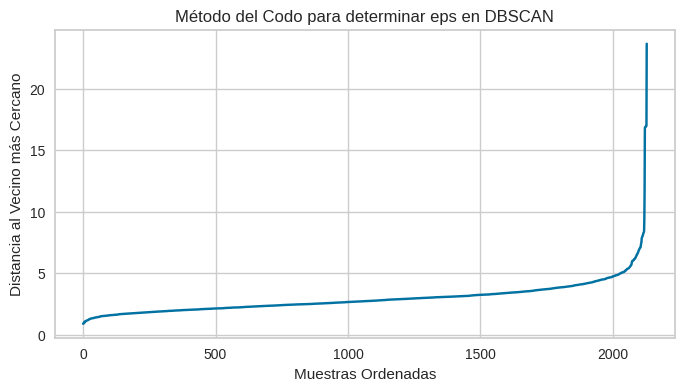

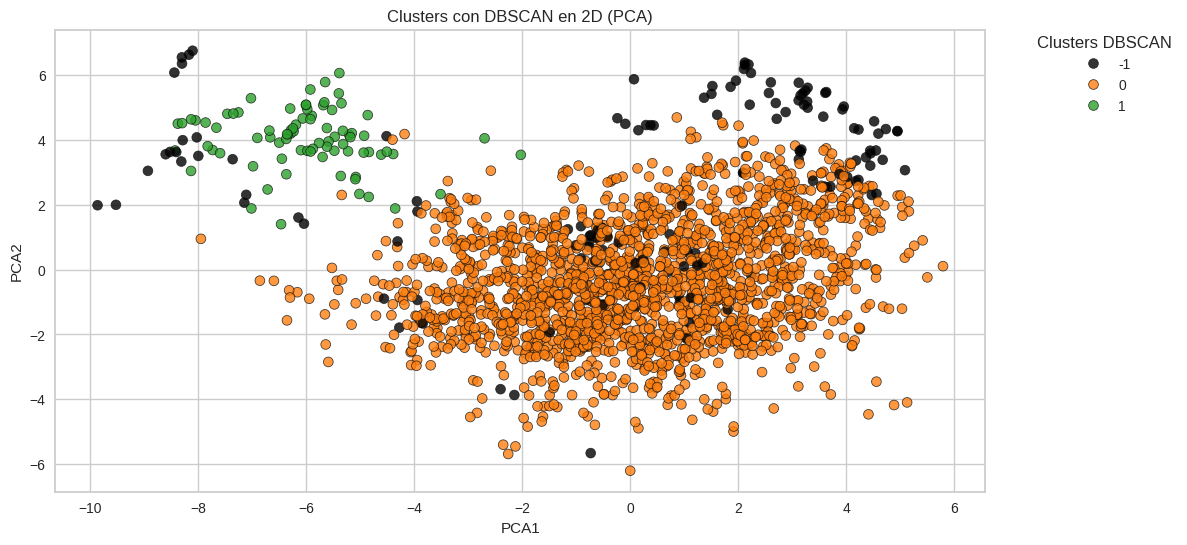

<ipython-input-15-58e90ec8c92e>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x="Cluster_DBSCAN", palette="viridis")


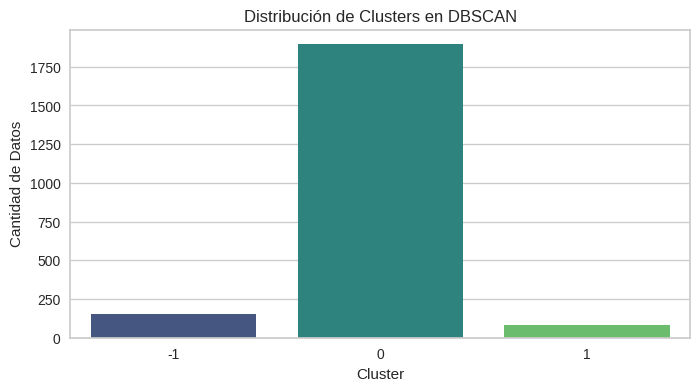

In [15]:
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

# Calcular distancias de los vecinos más cercanos
# Calcular las distancias a los 10 vecinos más cercanos para cada punto en los datos escalados
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(scaled_data)
# Obtener las distancias y los índices de los vecinos más cercanos
distances, indices = neighbors_fit.kneighbors(scaled_data)

# Ordenar las distancias del décimo vecino más cercano para cada punto
distances = np.sort(distances[:, 9], axis=0) # El índice 9 representa el décimo vecino más cercano

# Graficar el método del codo para determinar un valor óptimo de eps
plt.figure(figsize=(8, 4))
plt.plot(distances)
plt.xlabel("Muestras Ordenadas")
plt.ylabel("Distancia al Vecino más Cercano")
plt.title("Método del Codo para determinar eps en DBSCAN")
plt.show()

# Obtener el número de dimensiones del conjunto de datos escalado
num_dimensiones = scaled_data.shape[1]


# Aplicar el modelo DBSCAN con un valor de 'eps' (distancia máxima entre dos puntos para que se consideren vecinos)
# y 'min_samples' (número mínimo de puntos para formar un cluster)
dbscan = DBSCAN(eps=6.7, min_samples=2*num_dimensiones)
# Asignar a cada punto de datos un cluster (o -1 si es considerado un outlier)
df_clean["Cluster_DBSCAN"] = dbscan.fit_predict(scaled_data)

# Crear un mapa de colores sin incluir -1 (outliers)
unique_clusters = sorted(df_clean["Cluster_DBSCAN"].unique())  # Clusters únicos ordenados
colors = sns.color_palette("tab10", len(unique_clusters))  # Generar colores únicos

# Diccionario de colores para los clusters
color_dict = {-1: "black"}  # Outliers en negro
for i, cluster in enumerate(unique_clusters):
    if cluster != -1:
        color_dict[cluster] = colors[i % len(colors)]  # Evita problemas si hay más clusters que colores

# Crear la gráfica PCA con DBSCAN: visualizar los clusters en 2D utilizando las dos primeras componentes principales
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(data=df_clean, x="PCA1", y="PCA2", hue="Cluster_DBSCAN",
                          palette=color_dict, alpha=0.8, edgecolor="k")

handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title="Clusters DBSCAN",
           bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title("Clusters con DBSCAN en 2D (PCA)")
plt.show()

# Countplot para ver distribución de los clusters detectados por DBSCAN
plt.figure(figsize=(8, 4))
sns.countplot(data=df_clean, x="Cluster_DBSCAN", palette="viridis")
plt.title("Distribución de Clusters en DBSCAN")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de Datos")
plt.show()